# Small world assignment

<div style="display: flex; align-items: center;">
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/docs/m03-smallworld/lab03.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" style="vertical-align: -8px; margin-right: 10px;" />
        Open this notebook in Google Colab
    </a>
</div>


<div style="display: flex; align-items: center;">
    <a href="https://raw.githubusercontent.com/yy/netsci-course/master/docs/m03-smallworld/lab03.ipynb" download>
        <img src="http://yyahn.com/netsci-course/images/download_icon.png" style="vertical-align: -8px; margin-right: 10px;" />
        Download this notebook (File -> Save As)
    </a>
</div>

In this assignment, we will get ourselves more familiar with mathematical ways to understand networks, playing with walks, paths, and small-worldness. 

Let's start with importing the necessary libraries.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


## Adjacency matrix

Adjacency matrix $\mathbf{A}$ is an $N \times N$ matrix, where each row $i$ corresponds to a node $i$ and each column $j$ corresponds to a node $j$. If the network is undirected and unweighted, the element $\mathbf{A}_{ij}$ is 1 if there is an edge between node $i$ and node $j$, and 0 otherwise.

In a directed graph, the element $\mathbf{A}_{ij}$ can be used to represent either an edge from $i$ to $j$ or an edge from $j$ to $i$. We tend to use the latter ($j \rightarrow i$) because this makes variuos matrix operations easier to understand (see WWND Ch. 25). 

### Edges and degrees

Once you have an adjacency matrix, you can use it to compute various network properties. For example, the degree of a node $i$ is the sum of the elements in the $i$-th row (or column) of the adjacency matrix, i.e., $\sum_j \mathbf{A}_{ij}$.

**Q: can you write how we can calculate the number of edges in a network using the adjacency matrix? Assume that the network is undirected and unweighted.**

Explain as clearly as possible. If you're familiar with LaTeX, you can use LaTeX to write mathematical expressions.

<pre>
# YOUR SOLUTION HERE
</pre>

### How to they look like?

A useful exercise to build intuition into the adjacency matrix is to imagine how the adjacency matrix of a network would look like if we "draw" it. What I mean by that is to draw a square grid of size $N \times N$, and then fill in the cells according to the adjacency matrix (e.g., black if 1 and white if 0).

For instance, consider a random network where every edge is randomly placed with a probability $p$. What would the adjacency matrix look like? Think about it for a moment before you move on. Use the cell below to write down your thoughts (not graded). 

<pre>
# YOUR SOLUTION HERE
</pre>

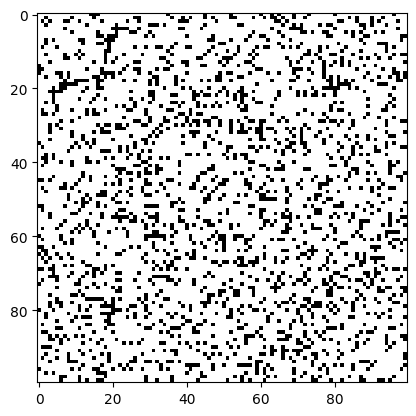

In [3]:
# We can draw the adjacency matrix of a graph using the imshow function from matplotlib
N = 100
p = 0.2
G = nx.erdos_renyi_graph(N, p)
A = nx.adjacency_matrix(G).todense()
plt.imshow(A, cmap='Greys', interpolation='none')

How about other types of graphs? What about a network with strong modular structure (if we reshuffle the rows and columns so that the structure is shown clearly)? How about DAG (directed acyclic graph)? How about bipartite graphs? 

It will be very useful for you to think about these questions and try to sketch the adjacency matrix of various types of networks. You can see some examples in WWND Ch. 25. 

### Walks and paths

Adjacency matrix also allows us to mathematically think about walks and paths. The simplest case is a walk of length 1. 

Think about this question: How many walks of length 1 are there from node $i$ to node $j$?

<details class="warning-class"><summary>Solution</summary><p>It's just $\mathbf{A}_{ji}$</p></details>

How about walks of length 2? Think about it first before revealing the solution. 

<details class="warning-class"><summary>Solution</summary><p>You need to go to a node (say $k$) that is connected to $i$ first. And then you need to be able to go from $k$ to $j$. Therefore, it's $\sum_k \mathbf{A}_{ik} \mathbf{A}_{kj}$</p></details>

**Q: Can you generalize this to walks of length $l$ from $i$ to $j$?** 

<pre>
# YOUR SOLUTION HERE
</pre>

## Computing shortest paths

It is interesting to see the link between the adjacency matrix and the number of walks with a certain length. For the shortest paths, it is much easier to think about the problem computationally and algorithmically, especially when the network involves weights and directions. Let's first think about the BFS (breadth-first search) algorithm. 

### BFS algorithm

When the network is unweighted, we can compute the shortest path and distance between any pair of nodes using the BFS algorithm. The algorithm is simple:

1. Start from the source node $s$ and set the distance to itself as 0.
2. Set the distance to all other nodes as $\infty$. Or you can simply keep a set/dictionary of distances and check whether you have visited the node before.
3. Add the source node to the queue.
4. While the queue is not empty, do the following:
    1. Pop the first node from the queue.
    2. For each neighbor of the popped node, if the distance is $\infty$, set the distance to the distance of the popped node plus 1, and add the neighbor to the queue.

If it is unclear why this works, I encourage you to try to run the algorithm on a piece of paper with a simple network and watch how the distance is updated. Also there are many good videos on YouTube that explain the BFS algorithm that you can watch as well!

**Q: Can you write a Python function that computes, for every node, the shortest distance to a given node using the BFS algorithm?**

In [35]:
def simple_bfs(G, source_node) -> dict:
    # this function returns a dictionary with the distance from the source node 
    # to all other nodes. 
    # e.g., {0: 0, 1: 1, 2: 1, 3: 1} means that the distance from the source node 
    # to node 0 is 0, to node 1 is 1, and so on. 
    
    distance_from_source = {}
    nodes_to_explore = []       # the queue

    # YOUR SOLUTION HERE

    return distance_from_source

# let's test the function
G = nx.Graph()
G.add_edges_from([(0, 1), (0,2), (1, 3), (3, 4), (1,4)])
print(simple_bfs(G, 0))

assert simple_bfs(G, 0) == {0: 0, 1: 1, 2: 1, 3: 2, 4: 2}  # this is the expected answer


{0: 0, 1: 1, 2: 1, 3: 2, 4: 2}


This function lets you compute the shortest path from a given node to all other nodes. We can now use this function to compute all possible shortest paths between every node pair, and then compute the average shortest path length. 

If we have $N$ nodes in our network, we have roughly $N^2$ shortest paths to compute. It is slow and also consumes a lot of memory. There is not a lot of things we can do to drastically reduce the computing time, but we can drastically reduce the memory usage if we only care about the average shortest path length. How would you do that? Think about it before you move on.

<details class="warning-class"><summary>Solution</summary><p>We can compute the shortest path length from a given node to all other nodes, and then keep only the counts of the shortest path lengths. In other words, instead keeping the dictionary that we had above, we can simply summarize it as: there is one node (0) with distance 0, two nodes (1, 2) with distance 1, and so on.</p></details>

To do this, we can use the `collections.Counter` class. If you are not familiar with it, read about it here: https://docs.python.org/3/library/collections.html#collections.Counter What it can do can be done with a dictionary, but it is often much more convenient to use `Counter`.

**Q: Can you write a Python function that computes the shortest path length from a given node to all other nodes, and then returns the summary as a `Counter`?**

In [36]:
from collections import Counter
def count_path_lengths(distances):
    # YOUR SOLUTION HERE

In [37]:
# this should be satisfied. 
assert count_path_lengths({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}) == Counter({0: 1, 1: 2, 2: 2})

**Q: Can you write a Python function that computes the average shortest path length of a network using the above function?**

In [38]:
# path_length_counter should be a Counter object with keys being path lengths 
# and values being the number of pairs with that path length.
path_length_counter = Counter()
G = nx.erdos_renyi_graph(1000, 0.01)

# YOUR SOLUTION HERE
    
print(path_length_counter)

Counter({3: 52894, 4: 36370, 2: 9330, 1: 982, 5: 324, 0: 100})


### Visualizing the results

Now that you have a list of the shortest paths for the graph, we can examine it by drawing a bar chart of shortest path length distribution. We can use the following snippets to draw the bar chart. 

In [39]:
a_counter = Counter({0:10, 1:20, 2:10, 3:1})
a_counter.items()

dict_items([(0, 10), (1, 20), (2, 10), (3, 1)])

In [40]:
list(zip(*a_counter.items()))

[(0, 1, 2, 3), (10, 20, 10, 1)]

**Q: Can you draw the bar chart for the shortest path length distribution of the network that we calculated above?**


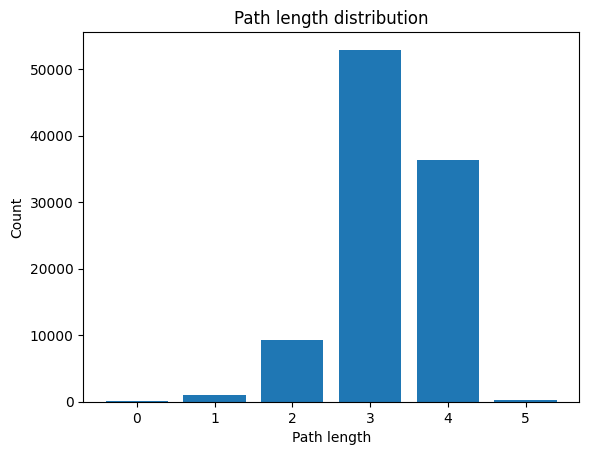

In [41]:
import matplotlib.pyplot as plt
# YOUR SOLUTION HERE

**Q: We can now also calculate the average path length of the whole network by averaging the path lengths.**

In [42]:
# calculate the average path length from the path_length_counter
# YOUR SOLUTION HERE
print(average_path_length)


3.25424


Can you make it as a function? 

In [45]:
def avg_path_length(G):
    # YOUR SOLUTION HERE

avg_path_length(G)

3.253168

Ok! Now you can compute the average shortest path length of a network! 🎉

In practice, you'd not implement the BFS algorithm yourself, but use a library like NetworkX, igraph, graph-tools, etc. But, it is really good to understand what is happening under the hood! 

In [46]:
# Here's how you can do the same (average path length of a graph) with networkx
nx.average_shortest_path_length(G)

3.2564244244244245

You may notice a small difference. I will leave it to you to identify why there is a difference (extra credit). 

### How does it scale?

Now go to https://icon.colorado.edu/#!/ and download multiple (at least three) networks that span a range of scale. For instance, pick a couple of networks with ~1000 nodes and then ~10000 nodes, and so on. Be careful with large networks! Calculating shortest paths is an expensive computation and it may take too much time (or not even finish)! Stick with not-so-large and not-too-small networks, but do experiment how far you can push. 

**Q: Using your code above, calculate the average path length of each network and also measure how long it takes.**

You can use either `%%time` or `%%timeit` Jupyter magic commands or use a script. `%%timeit` runs the code multiple times to get a better estimate. So it may not be suitable for large networks. 


In [49]:
%%timeit
total = 0
for i in range(1000000):
    total += i
  

24 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%%time
total = 0
for i in range(1000000):
    total += i

CPU times: user 60.8 ms, sys: 1.11 ms, total: 62 ms
Wall time: 61 ms


In [ ]:
# Use however many cells you need.

# YOUR SOLUTION HERE

**Q: now make two plots that show two relationships.** 

The first one is about the relationship between the number of nodes in your networks and their average path length. Are they correlated? You can test whether they have a roughly logarithmic relationship $ d \sim \log N$ or not. 

The second one is about the execution time and the number of nodes ($|V|$) & the number of edges ($|E|$). Is it proportional to $|V|\cdot|E|$? 

In [14]:
# YOUR SOLUTION HERE